In [30]:

import numpy as np
# import my_torchbox as tb
import parseBrats as pB
import matplotlib.pyplot as plt
import scipy
%load_ext autoreload
%autoreload 2
from misc import *
import segmentation_TDA as sTDA

def DICE(seg_1,seg_2):
    prod_seg = seg_1 * seg_2
    sum_seg = seg_1 + seg_2
    return 2*prod_seg.sum() / sum_seg.sum()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Trouver $t$ pour une image

/home/turtlefox/Documents/Doctorat/gliomaSegmentation_TDA/parseBrats.py:91: UserWarning: It is not recommended to set brats_list to None with BraTS2021database. It can lead to errors because ventricule segmentations where not made for all data.
  warn("It is not recommended to set brats_list to None with BraTS2021"


BratS lint is 1251 long
mean
>I am normalizinf True
BraTS name : BraTS2021_01618


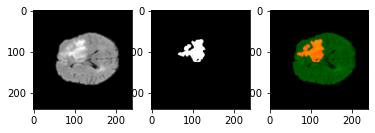

In [13]:
# brats_list = [
#     "BraTSReg_118"]
brats_list = None
pb = pB.parse_brats(brats_list=brats_list,
                    brats_folder='2021',
                    modality='flair',
                    get_template=False)
print(f"BratS lint is {len(pb.brats_list)} long")

i = 1
img,seg, = pb(i,to_torch=False,modality='flair')
# img = img_2
# seg = seg_2
seg[seg > 0] =1
print(f"BraTS name : {pb.brats_list[i]}")
img_b = scipy.ndimage.gaussian_filter(img, sigma=1)
fig,ax = plt.subplots(1,3)
s = 80
ax[0].imshow(img_b[:,:,s],cmap='gray')
ax[1].imshow(seg[:,:,s],cmap='gray')
ax[2].imshow(imCmp(img_b[:,:,s],seg[:,:,s]))

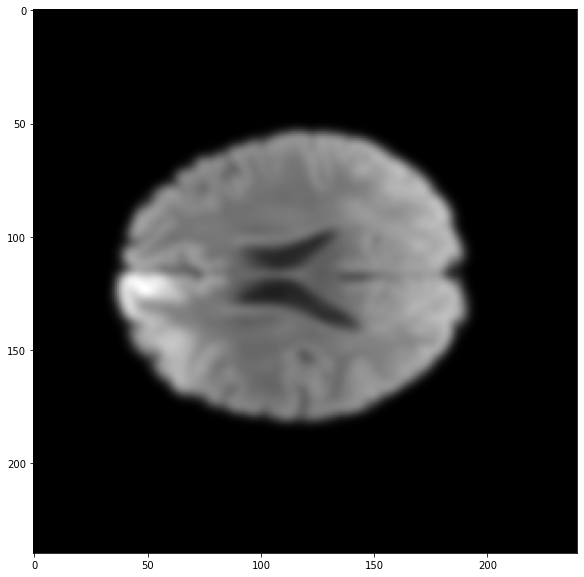

In [16]:

from nibabel import load
img =  load("/home/turtlefox/Documents/Doctorat/data/brats_2021/BraTS2021_00009/BraTS2021_00009_flair.nii.gz").get_fdata()
img = (img - img.min())/(img.max() - img.min())
seg = load("/home/turtlefox/Documents/Doctorat/data/brats_2021/BraTS2021_00009/BraTS2021_00009_seg.nii.gz").get_fdata()
seg[seg > 0] =1
img_b = scipy.ndimage.gaussian_filter(img, sigma=2)
plt.imshow(img_b[:,:,75],cmap='gray')

suggest_t : Compute curve... 
best_t : 0.4200807710553167

Computation of suggest_t done in  0:00:02s and 0.813cents  s
t : 0.4200807710553167
suggest_t : Compute curve... 
best_t : 0.5121397196595715

Computation of suggest_t done in  0:00:05s and 0.493cents  s
t : 0.5121397196595715
suggest_t : Compute curve... 
best_t : 0.556774361407089

Computation of suggest_t done in  0:00:11s and 0.479cents  s
t : 0.556774361407089


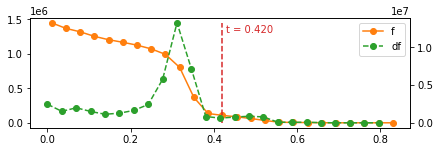

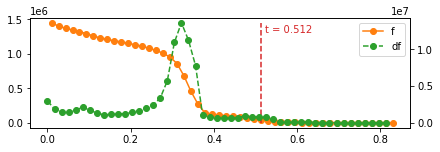

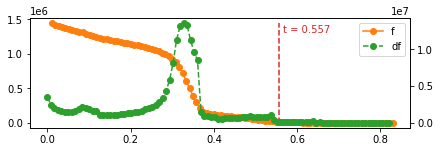

In [26]:
dt_threshold = .5
sugg_t25,curve,curve_dt_25,t_list_25 = sTDA.suggest_t(img_b,N=25,dt_threshold=dt_threshold)
print('t :',sugg_t25)
sugg_t50,curve,curve_dt_50,t_list_50 = sTDA.suggest_t(img_b,N=50,dt_threshold=dt_threshold)
print('t :',sugg_t50)
sugg_t100,curve,curve_dt_100,t_list_100 = sTDA.suggest_t(img_b,N=100,dt_threshold=dt_threshold)
print('t :',sugg_t100)

sugg_t = sugg_t25
seg_estimate = sTDA.get_highest_connectedComponent(img,sugg_t)

0.01 1.6491140045336432
0.026737990655319052 1.043420688892575
0.0434759813106381 0.8346146403494225
0.06021397196595715 0.8087086028639355
0.0769519626212762 0.9633320893459393
0.09368995327659525 1.1843969425554268
0.1104279439319143 0.9580154254436889
0.12716593458723335 0.7393210593243768
0.1439039252425524 0.5977691159396252
0.16064191589787147 0.6267229225410517
0.17737990655319053 0.6571328854978715
0.19411789720850955 0.7003096146403496
0.2108558878638286 0.7865953447227292
0.22759387851914767 0.920290816608614
0.2443318691744667 1.102750594349533
0.26106985982978576 1.347791231271079
0.2778078504851048 1.8715672858959476
0.29454584114042387 3.169815336982363
0.3112838317957429 6.063062558743851
0.328021822451062 7.54729225410516
0.34475981310638104 6.236108116326645
0.36149780376170004 4.323531403770665
0.3782357944170191 0.6014264388787528
0.39497378507233816 0.4208630508099741
0.4117117757276572 0.3663757118372312
0.42844976638297627 0.33369685409410077
0.44518775703829533 0

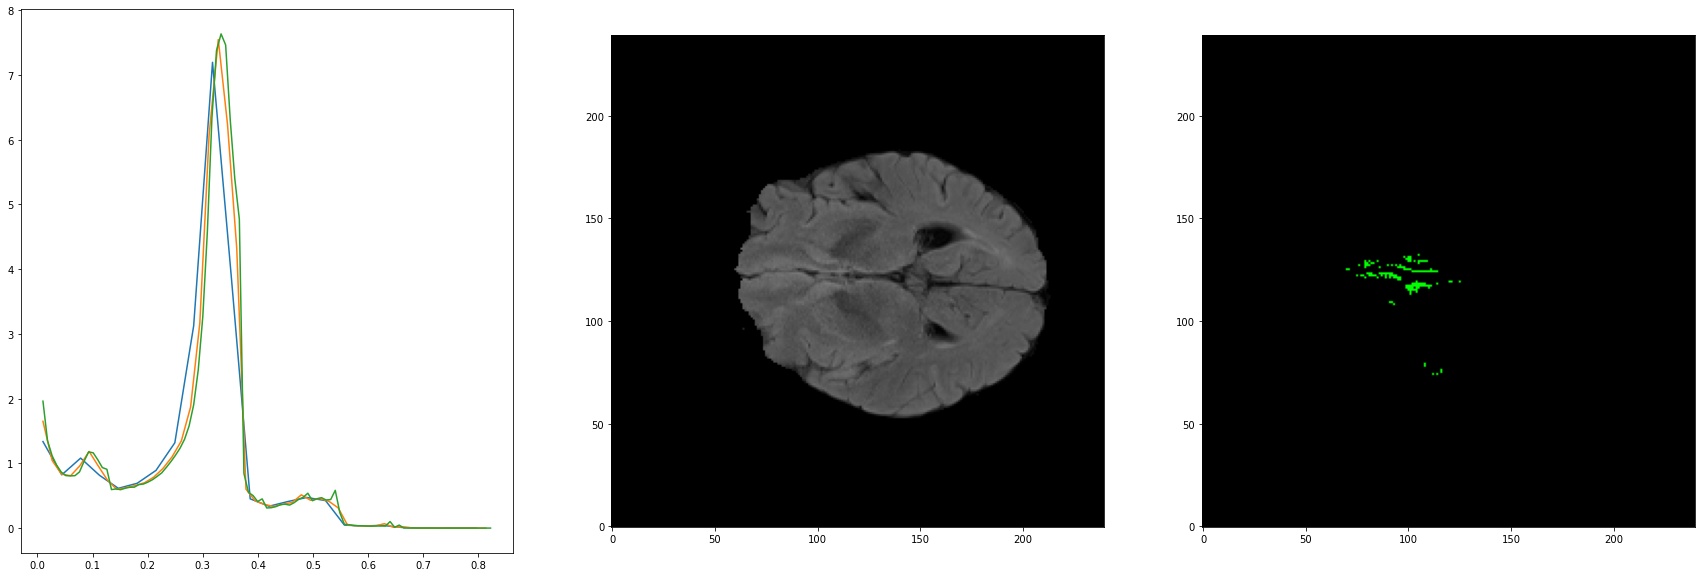

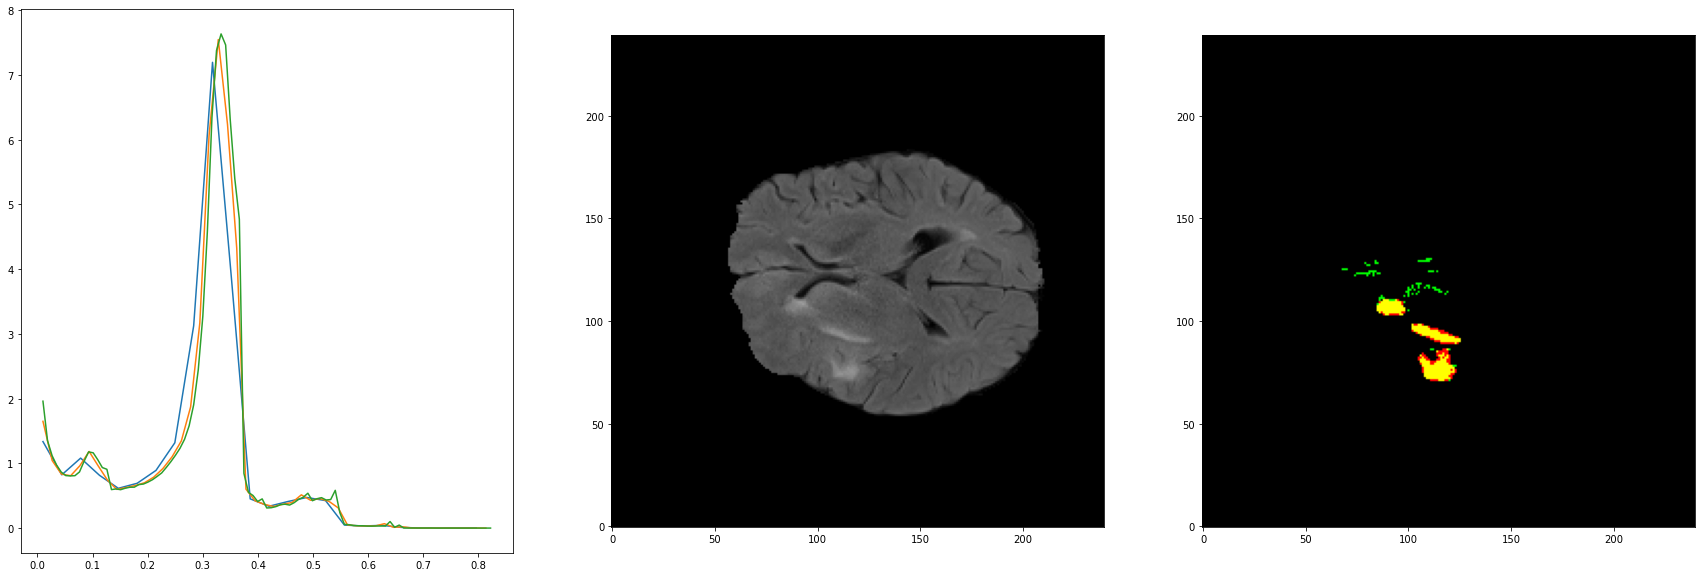

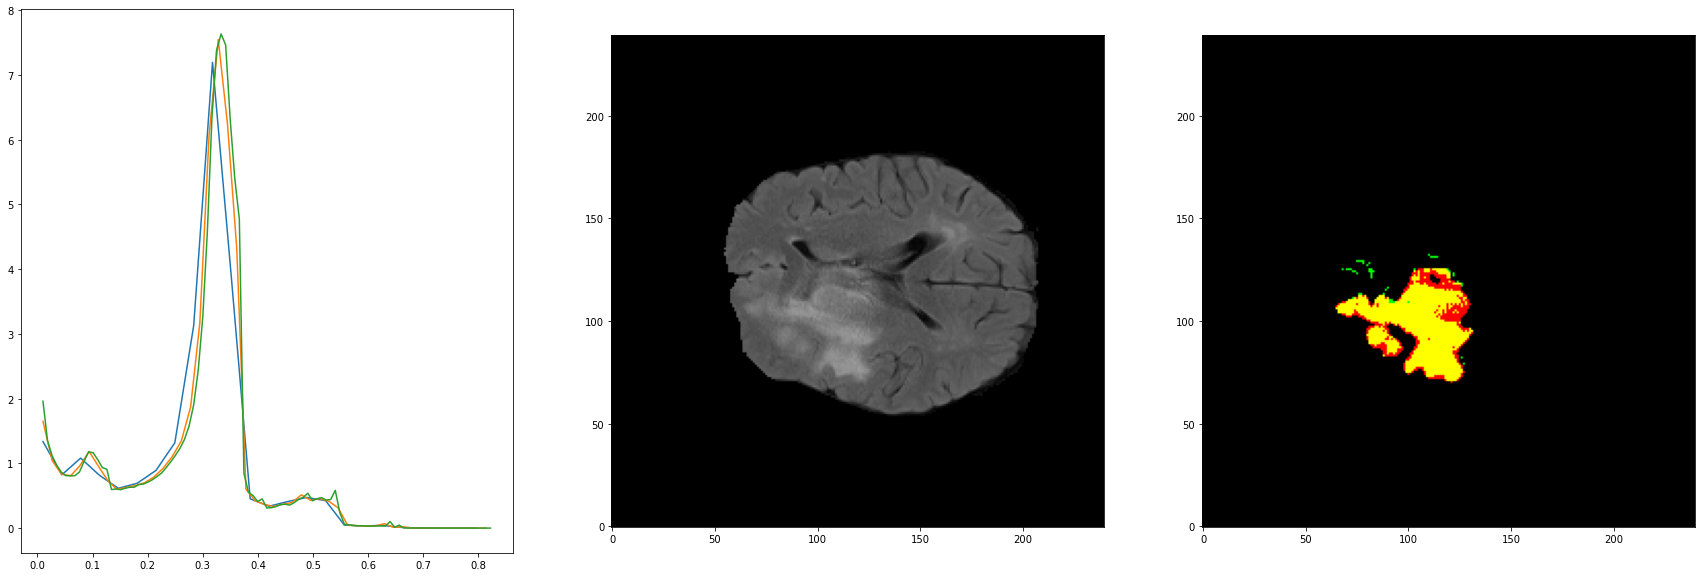

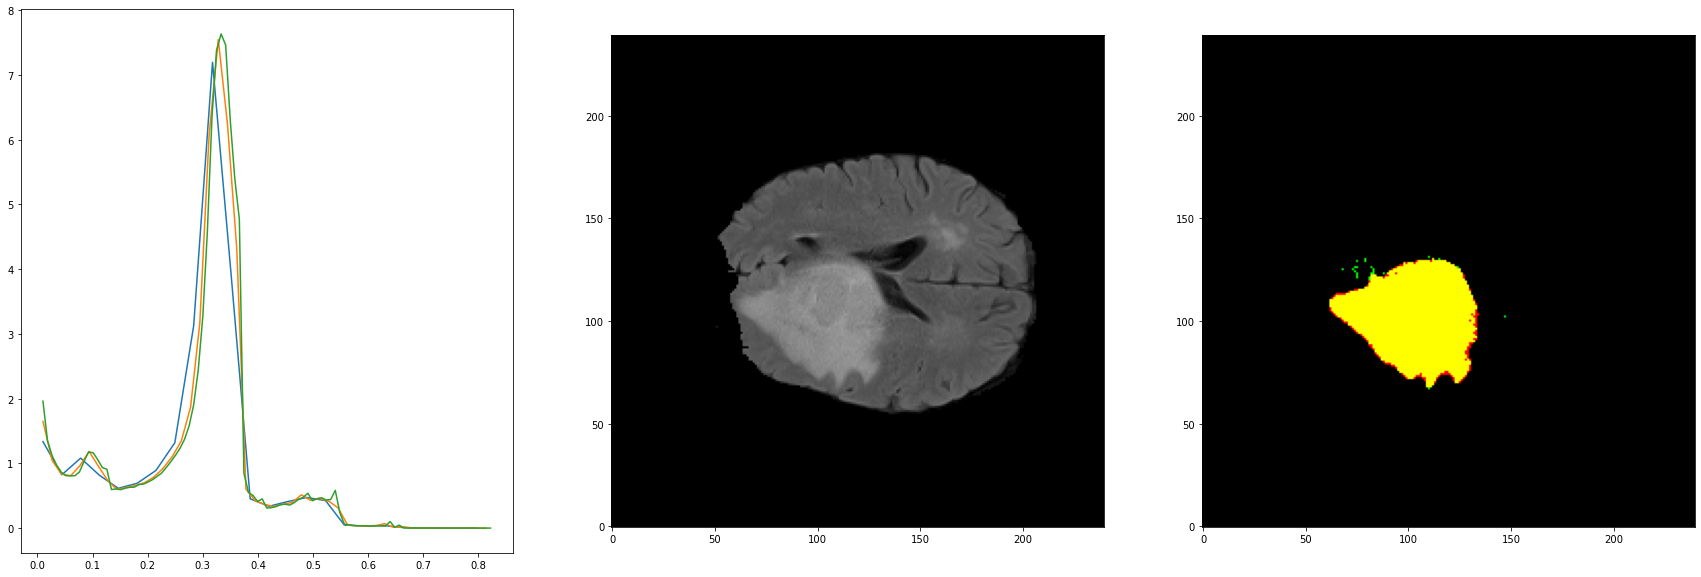

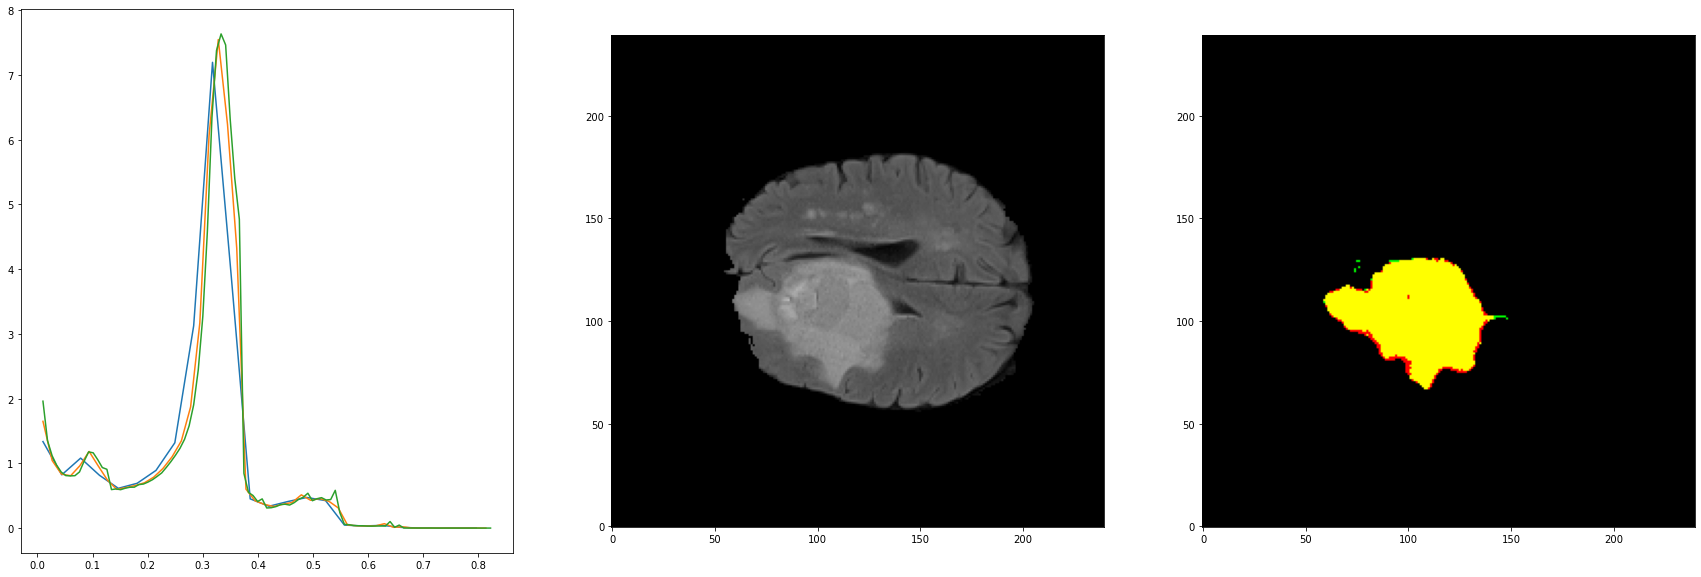

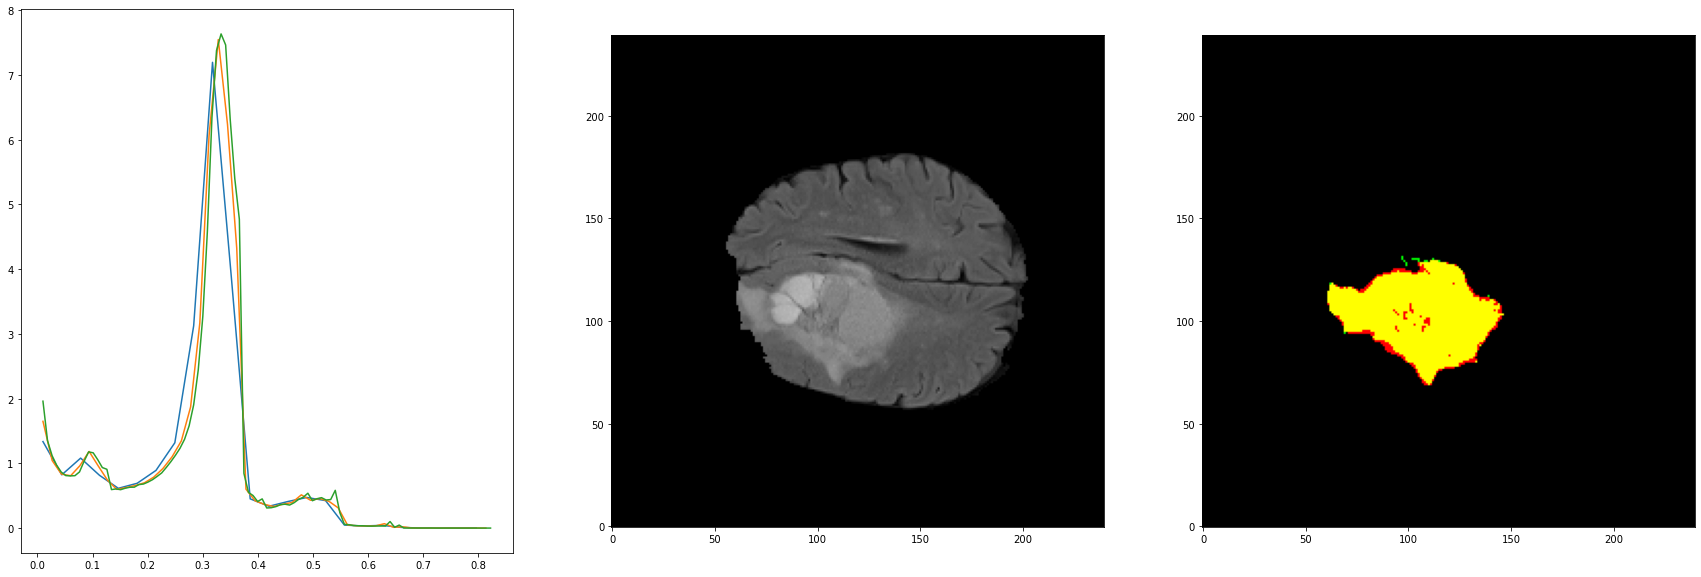

In [35]:
def f(curve_dt):
    return len(curve_dt)*curve_dt/curve_dt.sum()
plt.rcParams["figure.figsize"] = (30,10)

sugg_t = sugg_t25
seg_estimate = sTDA.get_highest_connectedComponent(img,sugg_t)

# slice_plot = 90
s =  [70,75,80,85,90,95]
for slice_plot in s:

    fig,ax = plt.subplots(1,3)
    ax[0].plot(t_list_25[:-1],f(curve_dt_25),label='25')
    ax[0].plot(t_list_50[:-1],f(curve_dt_50),label='50')
    ax[0].plot(t_list_100[:-1],f(curve_dt_100),label='100')

    ax[1].imshow(img[:,:,slice_plot],**DLT_KW_IMAGE)
    # ax[2].imshow(seg_estimate[:,:,slice_plot],**DLT_KW_IMAGE)
    ax[2].imshow(imCmp(seg_estimate[:,:,slice_plot],
                       seg[:,:,slice_plot]),origin='lower')

for t,s in zip(t_list_50,f(curve_dt_50)):
    print(t,s)

In [25]:

# curve_dt = curve_dt/curve_dt.max()
# N = curve.shape[0]
# print(N)
# best_t = -1
# id = N-2
# while best_t < 0:
#     dt = curve_dt[id]
#     if dt > 1e-1:
#         best_dt = dt
#         best_i = id
#         best_t = t_list[id]
#         print('best_i :',best_i,'best_t :',best_t,'best_dt :',best_dt)
#         break
#     else:
#         id -= 1


25
best_i : 9 best_t : 0.3625792402982542 best_dt : 0.448207473846896


suggest_t : Compute curve... 
best_t : 0.46375000000000005

Computation of suggest_t done in  0:00:04s and 0.058cents  s
t : 0.4054166666666667 ; best dice : 0.9070243630204015


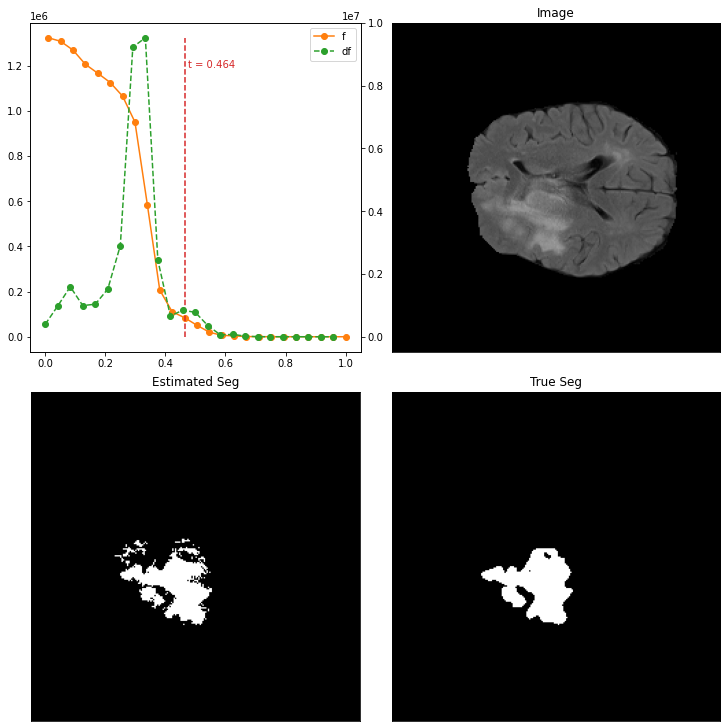

In [36]:
n_tests = 25
fig,ax = plt.subplots(2,2,figsize=(10,10),constrained_layout=True)

sugg_t,_,_,_ = sTDA.suggest_t(img,N=25,ax=ax[0,0])
t_min,t_max = sugg_t-.1,sugg_t+.1
t_list = np.linspace(t_min,t_max,n_tests)

def best_t_diceCmp(img,seg_to_cmp,t_list):
    score_save = np.zeros(len(t_list))
    best_score = 0
    best_t = -1
    for i,t in enumerate(t_list):
        # Fonction Raph
        try:
            seg_estimate = sTDA.get_highest_connectedComponent(img,t)
        except ValueError:
            seg_estimate = np.zeros(seg_to_cmp.shape)
        dice = DICE(seg_estimate,seg_to_cmp)
        score_save[i] = dice
        # print('t :',t,';dice :',dice)

        if dice > best_score:
            best_score = dice
            best_t = t
            best_seg = seg_estimate
    return best_t,score_save,best_seg
t,score_save,best_seg = best_t_diceCmp(img,seg,t_list)
print('t :',t,'; best dice :',score_save.max())
#
slice_plot = 80

# ax[0,0].plot(t_list,score_save)
ax[0,1].imshow(img[:,:,slice_plot],**DLT_KW_IMAGE)
ax[0,1].set_title('Image')
ax[1,0].imshow(best_seg[:,:,slice_plot],**DLT_KW_IMAGE)
ax[1,0].set_title('Estimated Seg')
ax[1,1].imshow(seg[:,:,slice_plot],**DLT_KW_IMAGE)
ax[1,1].set_title('True Seg')
set_ticks_off(ax[0,1])
set_ticks_off(ax[1,0])
set_ticks_off(ax[1,1])

plt.show()

# Find a lot of best t

In [195]:
# b = tb.parse_brats(brats_list=None,brats_folder='2022',modality='flair')
print(f"BratS lint is {len(pb.brats_list)} long")

n_test = 140
i_list = np.arange(n_test)
t_min,t_max = .2,.8
t_list = np.linspace(t_min,t_max,20)
print(t_list)
t_sugg_stock = -np.ones(n_test)
t_best_stock =  -np.ones(n_test)
dice_stock = np.zeros((2,n_test))


for i in i_list:
    print(f"=================={i+1}/{n_test}=====================")
    print(f"\nBraTS name : {pb.brats_list[i]}")

    img_1,_,seg,_ = pb(i,to_torch=False,modality='flair')
    seg[seg > 0] =1
    img = scipy.ndimage.gaussian_filter(img_1, sigma=2)

    print('t suggestion, make t_list')
    sugg_t,_,_,_ = sTDA.suggest_t(img,N=25,plot=False)
    t_sugg_stock[i] = sugg_t
    seg_estimate = sTDA.get_highest_connectedComponent(img,sugg_t)
    sugg_dice = DICE(seg_estimate,seg)
    dice_stock[0,i] = sugg_dice
    print('dice :', sugg_dice)

    print('find actual best t')
    t_min,t_max = max(0,sugg_t-.1),min(sugg_t+.1,1)
    t_list = np.linspace(t_min,t_max,30)
    t,score_save,_ = best_t_diceCmp(img,seg,t_list)
    print('t :',t,'; best dice :',score_save.max())
    t_best_stock[i] = t
    dice_stock[1,i] = score_save.max()
    ax[0].plot(t_list,score_save)



BratS lint is 140 long
[0.2        0.23157895 0.26315789 0.29473684 0.32631579 0.35789474
 0.38947368 0.42105263 0.45263158 0.48421053 0.51578947 0.54736842
 0.57894737 0.61052632 0.64210526 0.67368421 0.70526316 0.73684211
 0.76842105 0.8       ]
==================1/140=====================

BraTS name : BraTSReg_034
BraTSReg_034_00_0000_flair.nii.gz BraTSReg_034_01_0283_flair.nii.gz
t suggestion, make t_list
Compute curve... Execution time: 3084 ms.
best_t : 0.5357867799037972
dice : 0.786655137951557
find actual best t
t : 0.5392350557658662 ; best dice : 0.787264274265968
==================2/140=====================

BraTS name : BraTSReg_048
BraTSReg_048_00_0000_flair.nii.gz BraTSReg_048_01_0033_flair.nii.gz
t suggestion, make t_list
Compute curve... Execution time: 3170 ms.
best_t : 0.5016049807721725
dice : 0.8987680849586499
find actual best t
t : 0.4912601531859656 ; best dice : 0.9024223609080579
==================3/140=====================

BraTS name : BraTSReg_055
BraTSReg

mean absolute error: 0.022167487684729068
median error : 0.017241379310344862


<Figure size 2160x720 with 0 Axes>

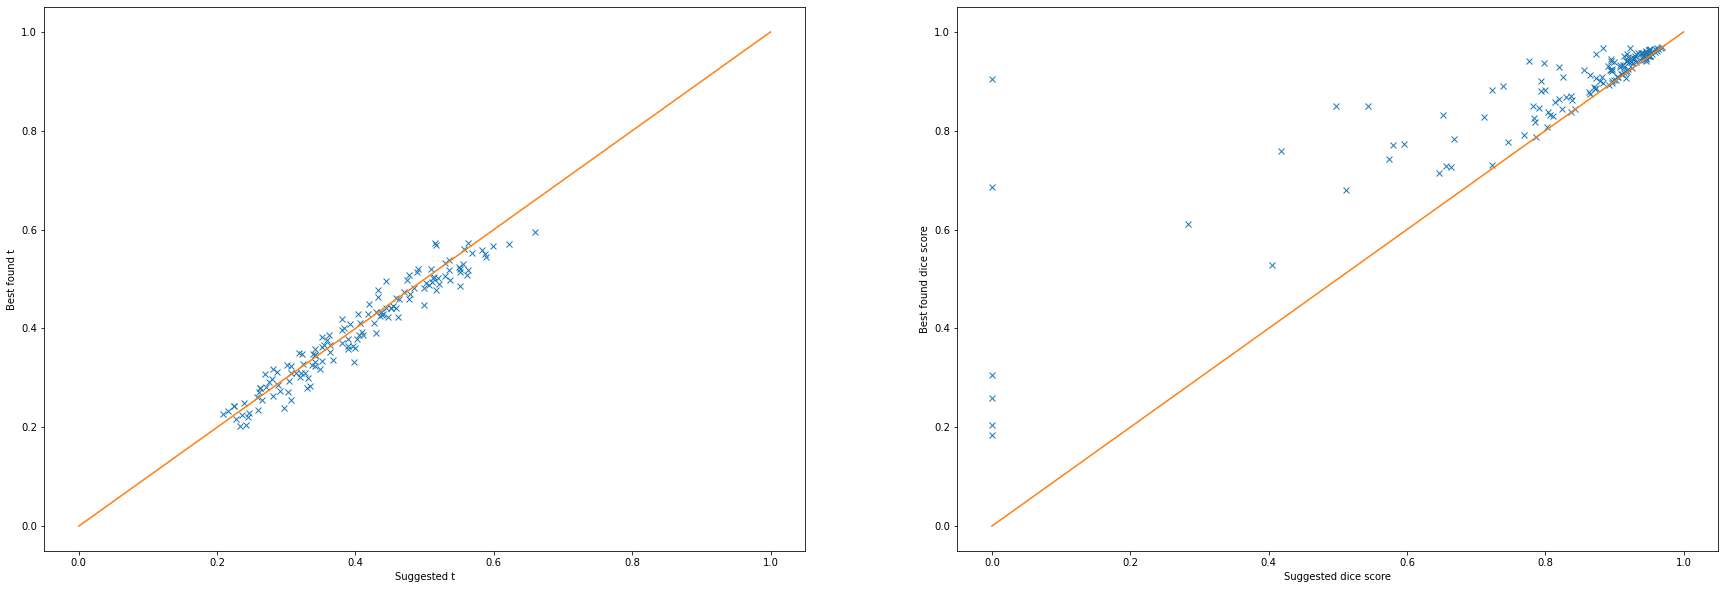

In [196]:
plt.figure()
fig,ax = plt.subplots(1,2)
ax[0].plot(t_sugg_stock,t_best_stock,'x')
ax[0].plot(np.linspace(0,1,10),np.linspace(0,1,10))
ax[0].set_xlabel("Suggested t")
ax[0].set_ylabel("Best found t")

# ax[1].plot(np.abs(t_best_stock-t_sugg_stock),dice_stock[0,:],'x',label='suggestion')
# ax[1].plot(np.abs(t_best_stock-t_sugg_stock),dice_stock[1,:],'x',label='best')
# ax[1].legend()
print('mean absolute error:',np.abs(t_best_stock-t_sugg_stock).sum()/n_test)
print('median error :',np.median(np.abs(t_best_stock-t_sugg_stock)))

ax[1].plot(dice_stock[0,:],dice_stock[1,:],'x')
ax[1].set_xlabel("Suggested dice score")
ax[1].set_ylabel("Best found dice score")
ax[1].plot(np.linspace(0,1,10),np.linspace(0,1,10))

In [ ]:
# Trouver